#  1. Edge Detection Segmentation



In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import glob

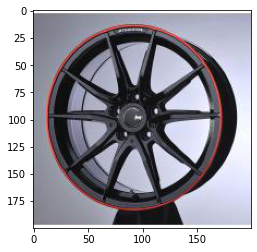

In [0]:
image = plt.imread("/content/drive/Shared drives/선빵팀 :)/최종_tuningstar 휠 이미지(2052개)/wheel/1001.jpg")
plt.imshow(image)

In [0]:

# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


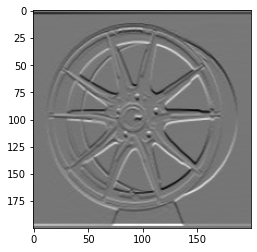

In [0]:
plt.imshow(out_h, cmap='gray')

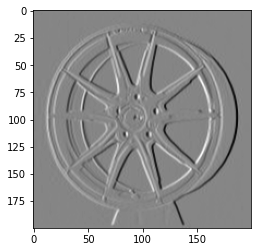

In [0]:
plt.imshow(out_v, cmap='gray')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


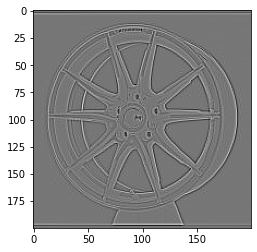

In [0]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

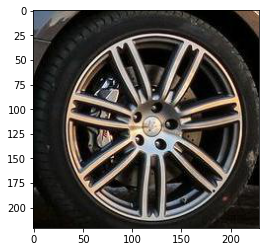

In [0]:
image = plt.imread('/content/drive/Shared drives/선빵팀 :)/프로젝트 데이터셋(06.02 수정)/onlywheels_현지/Maserati-Ghibli_GranLusso-2018-ig.jpg')
plt.imshow(image)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


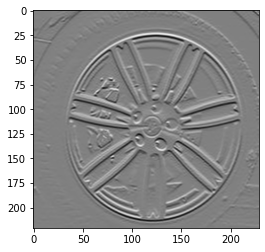

In [0]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.
plt.imshow(out_h, cmap='gray')

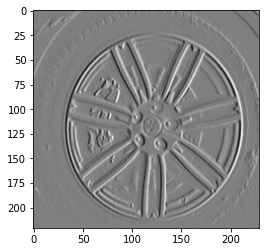

In [0]:
plt.imshow(out_v, cmap='gray')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


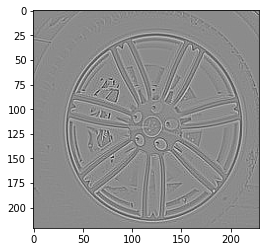

In [0]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

# 2. Region-based Segmentation

In [0]:
import cv2
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

### 기존 (원본 -> grayscale -> Adaptive Thresholding)

Text(0.5, 1.0, 'Adaptive Thresholding Image')

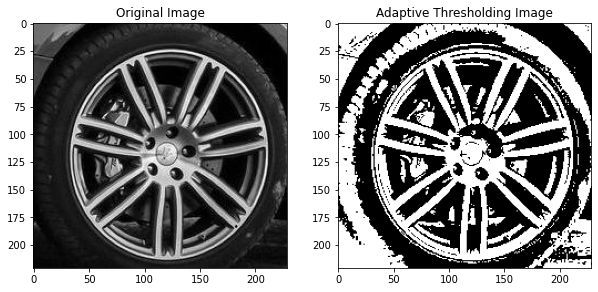

In [0]:

# 원본 이미지 불러오기
## opencv2에서는 Adaptive Thresholding을 사용할 때 8비트 형태의 이미지여야 함
image = cv2.imread('/content/drive/Shared drives/선빵팀 :)/프로젝트 데이터셋(06.02 수정)/onlywheels_현지/Maserati-Ghibli_GranLusso-2018-ig.jpg', cv2.IMREAD_GRAYSCALE)

# Adaptive Thresholding 적용
max_output_value = 255   # 출력 픽셀 강도의 최대값
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)

# plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_binarized, cmap='gray')
ax[1].set_title('Adaptive Thresholding Image')

### 기존 솔이 제안한 방법

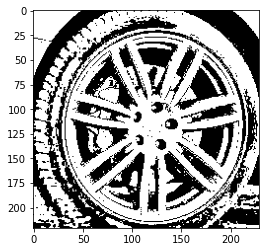

In [0]:
import cv2
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

#grayscale
image_grey = cv2.imread('/content/drive/Shared drives/선빵팀 :)/프로젝트 데이터셋(06.02 수정)/onlywheels_현지/Maserati-Ghibli_GranLusso-2018-ig.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상
image_enhanced = cv2.equalizeHist(image_grey)

# Adaptive Thresholding 적용 
max_output_value = 255   # 출력 픽셀 강도의 최대값
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_enhanced,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)

# plot
plt.imshow(image_binarized, cmap='gray')
plt.show()

### 기존 (충운오빠 오류확산법)

TypeError: ignored

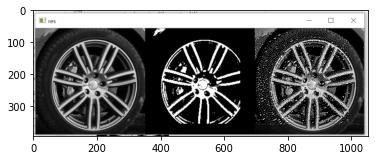

In [0]:
'''
import cv2
import numpy as np
from math import ceil, floor
from statistics import median
import random

src = cv2.imread('/content/drive/Shared drives/선빵팀 :)/프로젝트 데이터셋(06.02 수정)/onlywheels_현지/Maserati-Ghibli_GranLusso-2018-ig.jpg', cv2.IMREAD_GRAYSCALE)
origin = src.copy()
mat = np.zeros_like(src)

# ex) src.shape(282, 394)
# x in range(0, (394-1))
# y in range(0, (282-1))
# 아래 for문 range에 동일하게 적용
factor = 1
for x in range(0, 199):
    for y in range(0, 199):
        mat[y][x] = round(src[y][x]*factor/255) * 255 / factor

for y in range(0, 199):
    for x in range(0, 199):
        oldpixel = src[y][x]
        newpixel = round(src[y][x]*factor/255) * 255 / factor
        src[y][x] = newpixel
        err = int(oldpixel) - int(newpixel)

        try:
            src[y][x+1] = src[y][x+1] + err * 7/16
            src[y+1][x-1] = src[y+1][x-1] + err * 3/16
            src[y+1][x] = src[y+1][x] + err * 5/16
            src[y+1][x+1] = src[y+1][x+1] + err * 1/16
        except IndexError:
            continue

res = np.hstack([origin, mat, src])
cv2.imshow('res', res)
cv2.waitKey(0)
'''
src = cv2.imread('/content/drive/Shared drives/선빵팀 :)/프로젝트 데이터셋(06.02 수정)/onlywheels_현지[흑백]/캡처.PNG')
plt.imshow(src)
plt.imshow()

###  시도 (Region-based Segmentation) #사진화


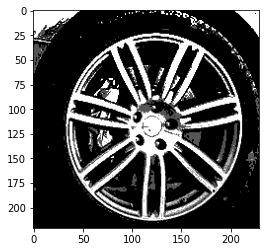

In [0]:
image = cv2.imread('/content/drive/Shared drives/선빵팀 :)/프로젝트 데이터셋(06.02 수정)/onlywheels_현지/Maserati-Ghibli_GranLusso-2018-ig.jpg')
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')